In [1]:
pip install pdfplumber


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/42.0 kB ? eta -:--:--
     -------------------------------------  41.0/42.0 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 407.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/48.5 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.5 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.5 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.5 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.5 kB ? eta -:--:--
     -------------------------------------- 48.5/48.5 kB 188.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/59.2 kB ? eta -:--:--
   ------ ---------------------------

In [3]:
import os
import pdfplumber

def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ""
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

def extract_all_pdfs(directory):
    extracted_data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pdf"):
            file_path = os.path.join(directory, filename)
            extracted_data[filename] = extract_text_from_pdf(file_path)
    return extracted_data

# Replace with your actual directory path
pdf_directory = "studynotiondata/66e3ca71fec7d8a2197d52e3_Artificial_Intelligence__Machine_Learning_in_Finance_/pdfs"
extracted_data = extract_all_pdfs(pdf_directory)

# Print the extracted text for each PDF
for filename, text in extracted_data.items():
    print(f"Extracted text from {filename}:")
    print(text[:500])  # Print first 500 characters as a preview
    print("\n" + "="*50 + "\n")

Extracted text from 66e3ca71fec7d8a2197d52e3_AIML.pdf:
Artificial Intelligence and Machine Learning
in Financial Services
April 3, 2024
Congressional Research Service
https://crsreports.congress.gov
R47997
SUMMARY
R47997
Artificial Intelligence and Machine Learning in
April 3, 2024
Financial Services
Paul Tierno
The financial industry’s adoption of artificial intelligence (AI) and machine learning (ML) is Analyst in Financial
evolving as financial firms employ ever greater levels of technology and automation to deliver Economics
services. Expanding 


Extracted text from 66e3ca71fec7d8a2197d52e3_AIML_1.pdf:
Artificial intelligence and machine learning in financial services
Market developments and financial stability implications
1 November 2017
The Financial Stability Board (FSB) is established to coordinate at the international level the
work of national financial authorities and international standard-setting bodies in order to
develop and promote the implementation of effective regu

In [4]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract key information from text
def extract_info(text):
    # Extract date if available
    date_match = re.search(r'(\w+ \d{1,2}, \d{4})', text)
    date = date_match.group(1) if date_match else "N/A"
    
    # Extract title (assume it's the first line)
    title = text.split('\n')[0].strip()
    
    # Count occurrences of key terms
    key_terms = ['artificial intelligence', 'machine learning', 'financial services', 'supervised learning', 'unsupervised learning']
    term_counts = {term: text.lower().count(term) for term in key_terms}
    
    return {
        'date': date,
        'title': title,
        'word_count': len(text.split()),
        **term_counts
    }

# Process the extracted text
data = []
for filename, text in extracted_data.items():
    info = extract_info(text)
    info['filename'] = filename
    data.append(info)

# Create a DataFrame
df = pd.DataFrame(data)

# Basic data analysis
print(df.describe())

# Correlation analysis
correlation = df[['word_count', 'artificial intelligence', 'machine learning', 'financial services']].corr()

# Visualizations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

plt.figure(figsize=(12, 6))
df[['artificial intelligence', 'machine learning', 'financial services']].sum().plot(kind='bar')
plt.title('Frequency of Key Terms')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('key_terms_frequency.png')
plt.close()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='word_count', y='artificial intelligence', size='machine learning', hue='financial services')
plt.title('Relationship between Document Length and Key Terms')
plt.tight_layout()
plt.savefig('document_length_vs_terms.png')
plt.close()

print("Visualizations saved as PNG files.")

         word_count  artificial intelligence  machine learning  \
count      7.000000                 7.000000          7.000000   
mean    8789.142857                16.714286         67.142857   
std     8425.507036                22.276402        102.796609   
min     1066.000000                 0.000000          1.000000   
25%     1397.000000                 1.000000         11.500000   
50%     5466.000000                 4.000000         40.000000   
75%    15751.000000                27.500000         56.000000   
max    20696.000000                56.000000        294.000000   

       financial services  supervised learning  unsupervised learning  
count            7.000000             7.000000               7.000000  
mean            16.428571            18.571429               9.714286  
std             22.314847            14.842025               9.105205  
min              0.000000             8.000000               0.000000  
25%              0.000000            11.00000

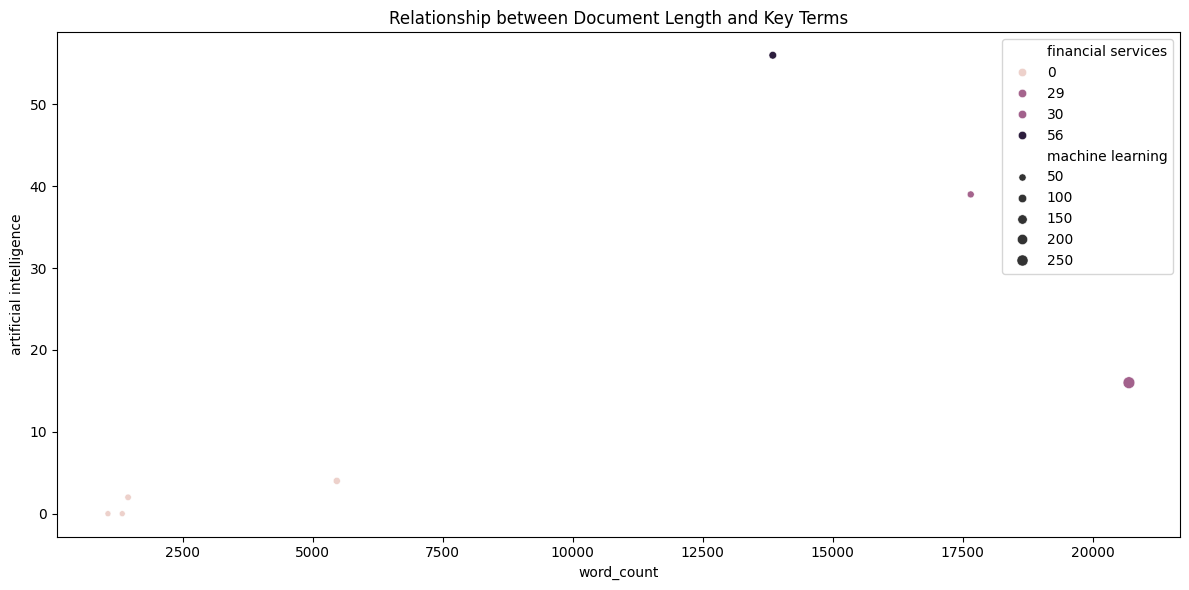

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='word_count', y='artificial intelligence', 
                size='machine learning', hue='financial services', ax=ax)

# Set the title
ax.set_title('Relationship between Document Length and Key Terms')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('document_length_vs_terms.png')

# Display the plot in the notebook
plt.show()

# Close the figure (optional, but good practice)
plt.close()

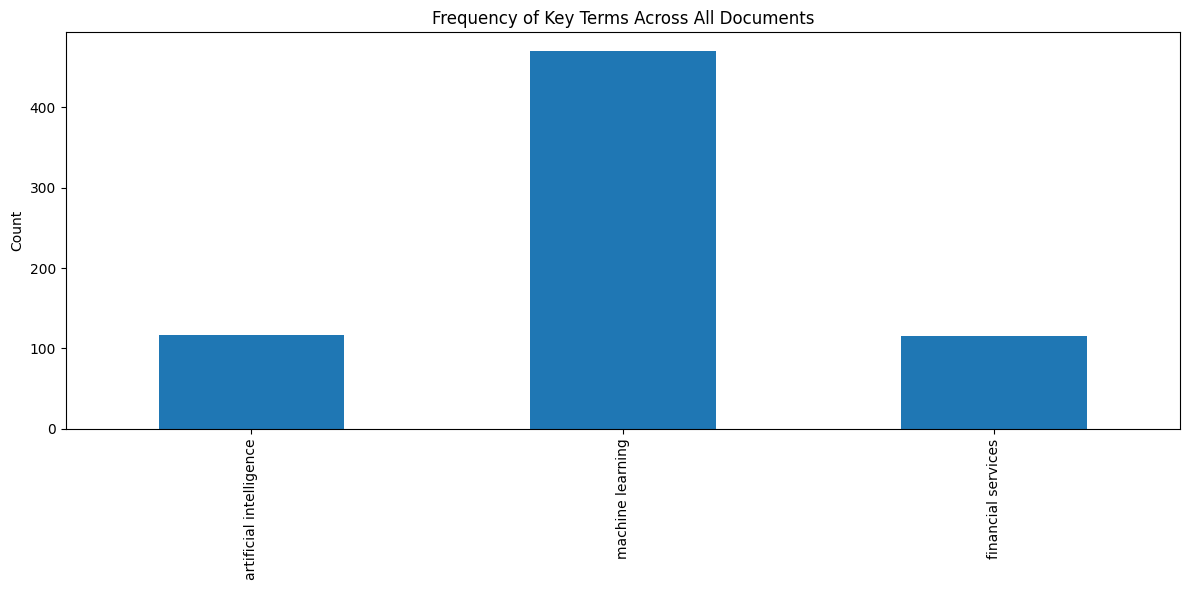

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the extracted and processed data

def save_and_show(fig, filename):
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# 1. Bar Plot: Frequency of Key Terms
plt.figure(figsize=(12, 6))
df[['artificial intelligence', 'machine learning', 'financial services']].sum().plot(kind='bar')
plt.title('Frequency of Key Terms Across All Documents')
plt.ylabel('Count')
save_and_show(plt.gcf(), 'key_terms_bar_plot.png')








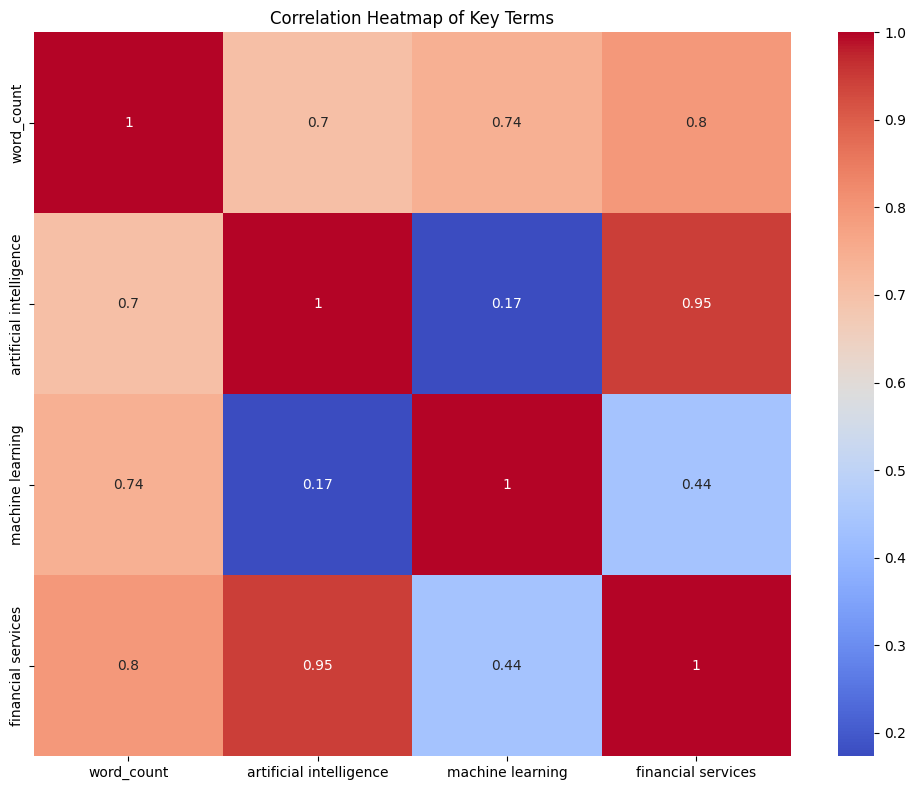

In [7]:
# 2. Heatmap: Correlation between terms
plt.figure(figsize=(10, 8))
correlation = df[['word_count', 'artificial intelligence', 'machine learning', 'financial services']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Terms')
save_and_show(plt.gcf(), 'correlation_heatmap.png')

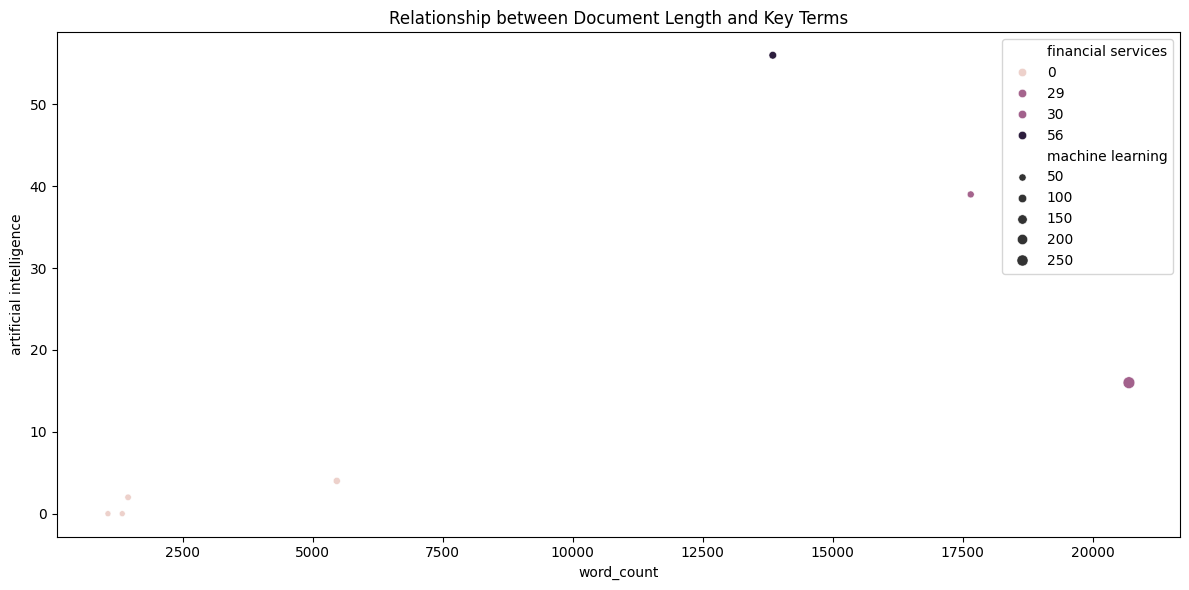

In [8]:
# 3. Scatter Plot: Document Length vs AI mentions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='word_count', y='artificial intelligence', 
                size='machine learning', hue='financial services')
plt.title('Relationship between Document Length and Key Terms')
save_and_show(plt.gcf(), 'scatter_plot.png')

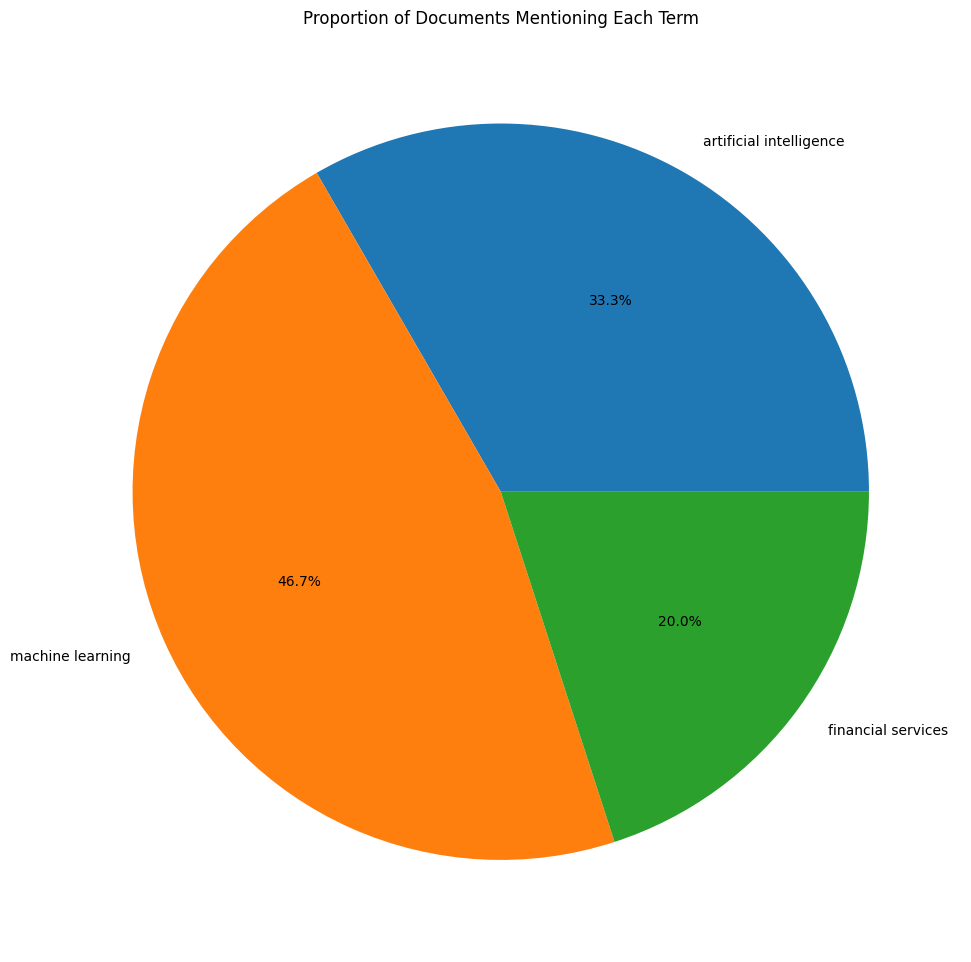

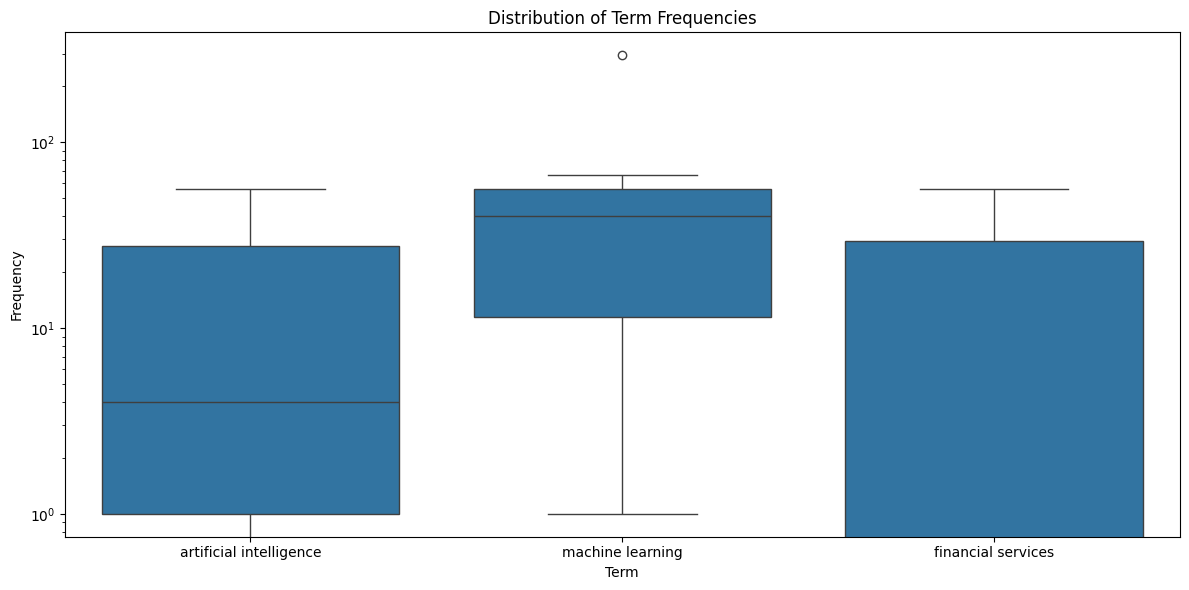

In [9]:
# 4. Pie Chart: Proportion of Documents Mentioning Each Term
plt.figure(figsize=(10, 10))
mentions = (df[['artificial intelligence', 'machine learning', 'financial services']] > 0).sum()
plt.pie(mentions, labels=mentions.index, autopct='%1.1f%%')
plt.title('Proportion of Documents Mentioning Each Term')
save_and_show(plt.gcf(), 'pie_chart.png')

# 5. Box Plot: Distribution of Term Frequencies
plt.figure(figsize=(12, 6))
df_melted = df.melt(value_vars=['artificial intelligence', 'machine learning', 'financial services'], 
                    var_name='Term', value_name='Frequency')
sns.boxplot(x='Term', y='Frequency', data=df_melted)
plt.title('Distribution of Term Frequencies')
plt.yscale('log')  # Use log scale for better visibility
save_and_show(plt.gcf(), 'box_plot.png')


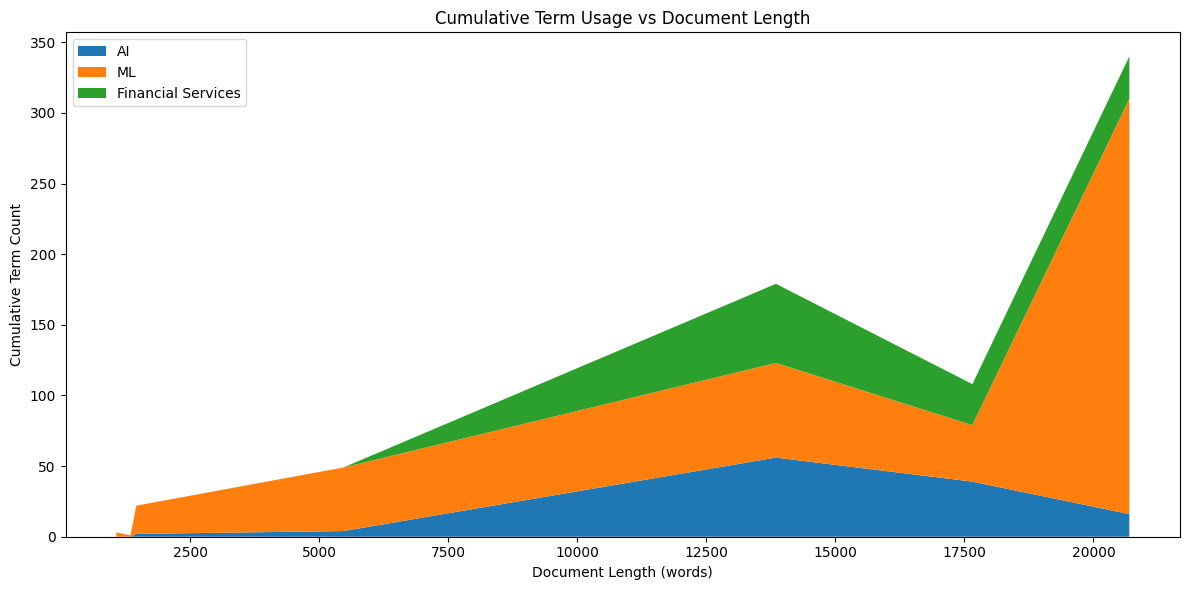

All plots have been saved and displayed.


In [11]:
# 6. Stacked Area Chart: Cumulative Term Usage
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values('word_count')
plt.stackplot(df_sorted['word_count'], 
              df_sorted['artificial intelligence'],
              df_sorted['machine learning'],
              df_sorted['financial services'],
              labels=['AI', 'ML', 'Financial Services'])
plt.title('Cumulative Term Usage vs Document Length')
plt.xlabel('Document Length (words)')
plt.ylabel('Cumulative Term Count')
plt.legend(loc='upper left')
save_and_show(plt.gcf(), 'stacked_area_chart.png')

print("All plots have been saved and displayed.")

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Assuming 'extracted_data' is your dictionary with filenames as keys and extracted text as values

# Combine all texts into a single corpus
corpus = list(extracted_data.values())

# Create TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(corpus)

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.array(tfidf_matrix.mean(axis=0)).flatten()

# Create a DataFrame with words and their mean TF-IDF scores
tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf_score': mean_tfidf_scores})

# Sort by TF-IDF score in descending order
tfidf_df = tfidf_df.sort_values('tfidf_score', ascending=False)

# Select top 30 keywords
top_keywords = tfidf_df.head(30)



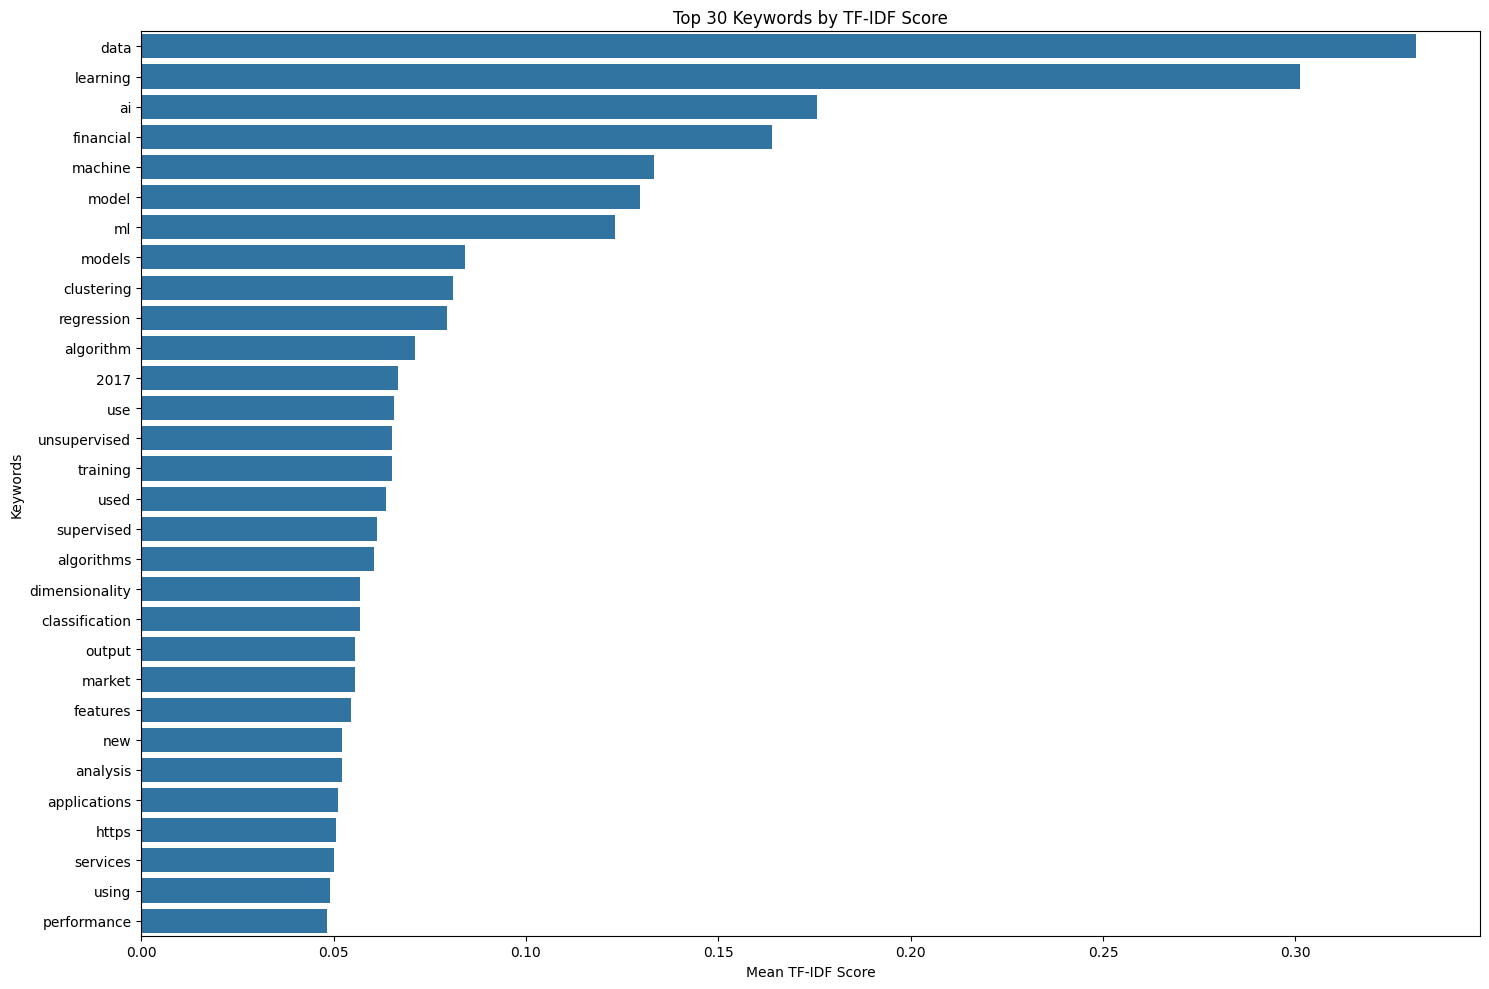

In [14]:
# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='tfidf_score', y='word', data=top_keywords)
plt.title('Top 30 Keywords by TF-IDF Score')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Keywords')
plt.tight_layout()
plt.savefig('top_30_keywords.png')
plt.show()



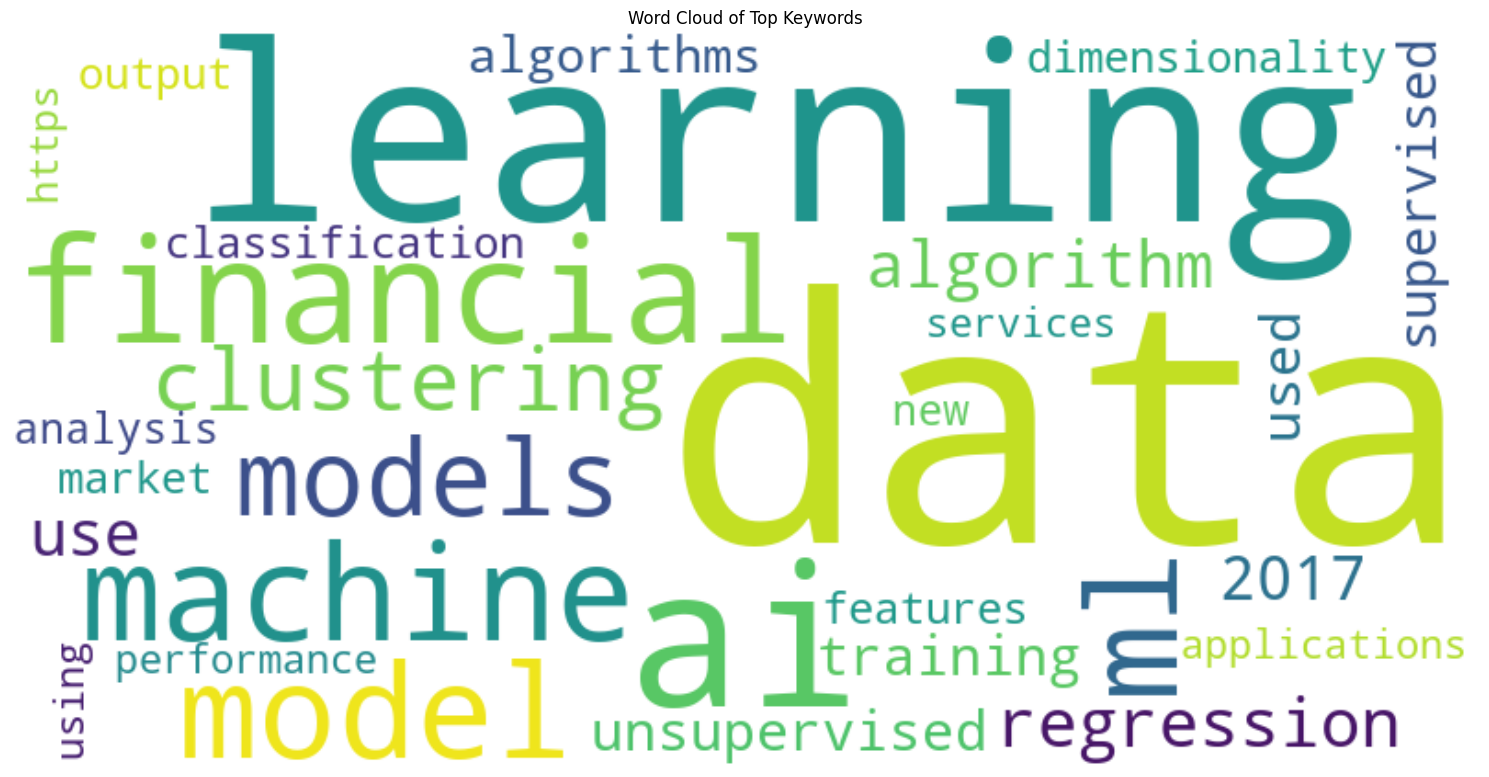

Top 30 Keywords:
               word  tfidf_score
280            data     0.331413
558        learning     0.301133
100              ai     0.175652
401       financial     0.164070
582         machine     0.133244
613           model     0.129535
611              ml     0.123060
615          models     0.084086
218      clustering     0.081007
770      regression     0.079449
103       algorithm     0.071078
24             2017     0.066845
964             use     0.065740
962    unsupervised     0.065114
936        training     0.065111
965            used     0.063714
893      supervised     0.061367
105      algorithms     0.060630
320  dimensionality     0.056996
213  classification     0.056902
663          output     0.055529
595          market     0.055529
393        features     0.054569
629             new     0.052255
112        analysis     0.052088
121    applications     0.051265
472           https     0.050630
838        services     0.050229
970           using     0.

In [15]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(top_keywords['word'], top_keywords['tfidf_score']))
)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Keywords')
plt.tight_layout()
plt.savefig('keyword_wordcloud.png')
plt.show()

print("Top 30 Keywords:")
print(top_keywords)
print("\nVisualizations saved as 'top_30_keywords.png' and 'keyword_wordcloud.png'")